In [7]:
import numpy as np
import ugradio
import matplotlib.pyplot as plt
#%matplotlib inline

In [8]:
moon = np.load('big_moonfinal.npz')
tstart = moon['time'][0]
print tstart #Unix time that observation began (seconds)

1552517557.014736


## Plotting Raw Data

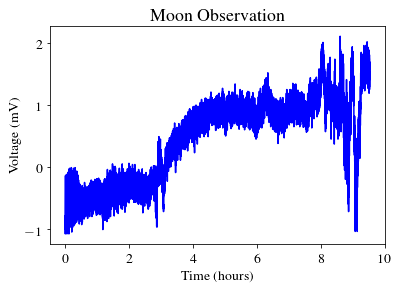

In [9]:
plt.plot((moon['time']-moon['time'][0])/3600, moon['volts']*1e4, 'b')

plt.title('Moon Observation')
plt.xlabel('Time (hours)')
plt.ylabel('Voltage (mV)')

plt.rc('font', size=14)
plt.rc('axes', titlesize=18)
plt.rc('font',**{'family':'serif','serif':['Times']})
plt.rc('text', usetex=True)

plt.savefig('Moon.png', bbox_inches='tight')
plt.show()

## Plotting Power Spectrum

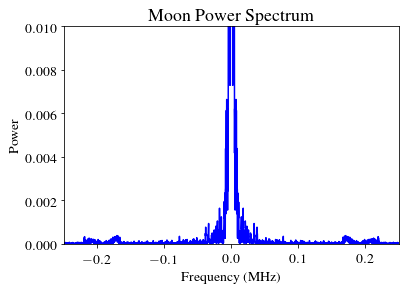

In [10]:
Vmoon = np.fft.fft(moon['volts'])
Pmoon = np.abs(Vmoon)**2
Pmoon = np.fft.fftshift(Pmoon)
Freq_Pmoon = np.fft.fftfreq(len(Pmoon), 1/6.25)
Freq_Pmoon = np.fft.fftshift(Freq_Pmoon)

plt.plot(Freq_Pmoon, Pmoon, 'b')
#%matplotlib notebook

plt.title('Moon Power Spectrum')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Power')

plt.ylim(0, 0.01)
plt.xlim(-0.25,0.25)

plt.show()

## Filtering the Voltages

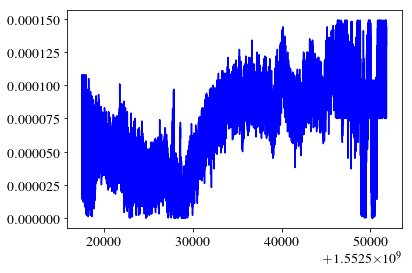

In [11]:
#filt = np.where(0 < moon['volts'], moon['volts'], 0) #If the condition is not met, return 0.

V_filtered = V_spec
for i in range (0,len(P_moon)):
    if (f[i]>-0.04) and (f[i]<-0.02):
        V_filtered[i] = V_spec[i]
    if (f[i]<0.04) and (f[i]>0.02):
        V_filtered[i] = V_spec[i]
    else:
        V_filtered[i] = 0
        
v_filtered = np.fft.ifft(V_spec)

plt.plot(T-T[0],v_filtered)
plt.show()

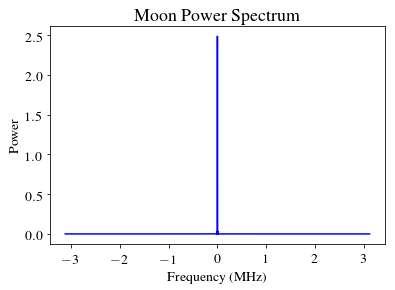

In [12]:
Vmoon2 = np.fft.fft(filt)
Pmoon2 = np.abs(Vmoon)**2
Pmoon2 = np.fft.fftshift(Pmoon2)
Freq_Pmoon2 = np.fft.fftfreq(len(Pmoon2), 1/6.25)
Freq_Pmoon2 = np.fft.fftshift(Freq_Pmoon2)

plt.plot(Freq_Pmoon2, Pmoon2, 'b')
#%matplotlib notebook

plt.title('Moon Power Spectrum')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Power')

plt.show()

## Hour Angle (LHA = LST - RA)

In [41]:
time = moon['time']
tstart = time[0]
tend = time[-1]

#Testing with start and end times

jul_tstart = ugradio.timing.julian_date(tstart)
jul_tend = ugradio.timing.julian_date(tend)
#print jul_tstart, jul_tend

#Getting the LST (no for loop needed)

jul_t = ugradio.timing.julian_date(time)
lst_t = ugradio.timing.lst(jul_t)
#print lst_t

#Getting the RA (for loop needed)

RA_dec_tstart = ugradio.coord.moonpos(jul_tstart)


for i in time[i]: 
    jul_t = ugradio.timing.julian_date(time[i])
    RA_dec_t = ugradio.coord.moonpos(jul_t)
return RA_dec_t

RA_t = RA_dec_t[0] 
#print RA_t

#HA = lst_t - RA_t

SyntaxError: can't assign to literal (<ipython-input-41-7021967edee2>, line 22)

## Bessel Analysis

In [13]:
bess3 = np.array[(3.83171, 7.01559, 10.1735)]
bess6 = np.array[(3.83171, 7.01559, 10.1735, 13.3237, 16.4706, 19.6159)]

TypeError: 'builtin_function_or_method' object has no attribute '__getitem__'